$a \frac{d^2 y}{dx^2} + b \frac{dy}{dx} + c y = 0$


Characteristic equation:

$a r^2 + b r + c = 0$

Solution with real roots:

$y=c_1 e^{r_1 x} + c_2 e^{r_2 x}$

$y'=c_1 r_1 e^{r_1 x} + c_2 r_2 e^{r_2 x}$

Solution with repeated roots:

$y=c_1 e^{r x} + c_2 x e^{r x}$

$y'=c_1 r e^{r x} + c_2 e^{r x} + c_2 x r e^{r x}=c_1\left(r e^{rx}\right) + c_2 \left(e^{rx} \left(1+rx\right)\right)$

Solution with complex roots:

$y=e^{\lambda x} \left(c_1 \sin \mu x + c_2 \cos \mu x \right)$

$y'=\lambda e^{\lambda x} \left(c_1 \cos \mu t + c_2 \sin \mu t\right)+e^{\lambda t} \left(-\mu c_1 \sin \mu t + \mu c_2 \cos \mu t\right)$

Numerical discretization: $a \frac{y_n-2y_{n-1}+y_{n-2}}{\Delta x^2} + b \frac{y_n-y_{n-1}}{\Delta x} + c y_n= 0$

$a \frac{y_n}{\Delta x^2} +a\frac{-2y_{n-1}+y_{n-2}}{\Delta x^2} + b \frac{y_n}{\Delta x} + b \frac{-y_{n-1}}{\Delta x} + c y_n = 0$

$y_n\left(\frac{a}{\Delta x^2}+\frac{b}{\Delta x}+c\right)=a\frac{2y_{n-1}-y_{n-2}}{\Delta x^2}+b \frac{y_{n-1}}{\Delta x}$

$y_n\left(a+b\Delta x+c\Delta x^2\right)=a\left(2y_{n-1}-y_{n-2}\right) + b\Delta x y_{n-1}$

$y_n = \frac{a\left(2y_{n-1}-y_{n-2}\right) + b\Delta x y_{n-1}}{\left(a+b\Delta x+c\Delta x^2\right)}$

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_second(nt, dt, y_0, yp_0, a, b, c):
  time=np.linspace(0,nt*dt,nt)
  y=np.full(time.shape,y_0)
  y[1]+=dt*yp_0
  for n in range(2,nt):
    y[n]=a*(2*y[n-1]-y[n-2])
    y[n]+=b*dt*y[n-1]
    y[n]/=(a+b*dt+c*dt*dt)
  return (time, y)

def discriminant(a,b,c):
  return b*b-4*a*c

def solve_quadratic(a,b,c):
  disc=cmath.sqrt(discriminant(a,b,c))/2*a
  common=(-b/2*a)
  return (common-disc,common+disc)

def solve_cramer(a1,b1,c1,a2,b2,c2):
  det_common=a1*b2-a2*b1
  det_1=c1*b2-c2*b1
  det_2=a1*c2-a2*c1
  return (det_1/det_common,det_2/det_common)

def solve_exact(nt, dt, y_0, yp_0, a, b, c):
  time = np.linspace(0,nt*dt,nt)
  disc=discriminant(a,b,c)
  if disc>0:
    r1,r2=solve_quadratic(a,b,c)
    #c1+c2=y_0
    #r1*c1+r2*c2=yp_0
    c1,c2=solve_cramer(1,1,y_0,r1,r2,yp_0)
    return (time, c1*np.exp(r1*time)+c2*np.exp(c2*time))
  elif disc==0:
    r,_=solve_quadratic(a,b,c)
    #c1=y_0
    #c2=yp_0-y_0*r
    c1=y_0
    c2=yp_0-y_0*r
    return (time, c1*np.exp(r*time)+c2*time*np.exp(r*time))
  else: #if disc<0
    r1,r2=solve_quadratic(a,b,c)
    lambd=r2.real
    mu=r2.imag
    c1=y_0
    c2=(yp_0-lambd*y_0)/mu
    return (time, np.exp(lambd*time)*(c1*np.cos(mu*time)+c2*np.sin(mu*time)))

In [3]:
a_glob=1.0
b_glob=-1.0
c_glob=1.25
y_0_glob=1.0
yp_0_glob=0.5

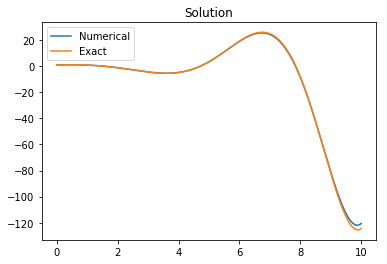

In [4]:
tim,numerical=solve_second(2000,0.005,y_0_glob,yp_0_glob,a_glob,b_glob,c_glob)
plt.plot(tim,numerical)
tim2,exac=solve_exact(2000,0.005,y_0_glob,yp_0_glob,a_glob,b_glob,c_glob)
plt.plot(tim2,exac)
plt.legend(["Numerical","Exact"])
plt.title("Solution")
plt.show()

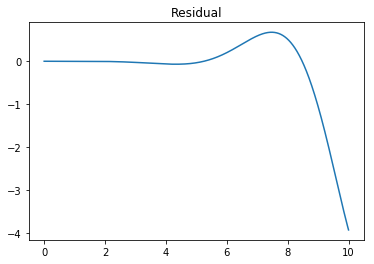

In [5]:
plt.plot(tim,exac-numerical)
plt.title("Residual")
plt.show()